

---WATER LEVEL PREDICITION FOR EPICS---



In [55]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

Load data

In [56]:
data = pd.read_csv('/content/waterlevels final dataset- Epics III.csv')
X = data.drop(['Water Level'], axis=1)
y = data['Water Level'].values.reshape(-1, 1)
evap = data['Evaporation'].values.reshape(-1, 1)
salinity = data['Salinity'].values.reshape(-1,1 )
precipitation = data['Precipitation'].values.reshape(-1, 1)

In [57]:
data.head()

,Precipitation,Water Level,Salinity,Evaporation
0,71.966667,334.133462,65.0,14.735714
1,112.875000,334.133462,71.5,14.735714
2,77.225000,334.133462,71.5,14.735714
3,123.466667,282.060000,71.5,14.735714
4,58.433333,189.293000,71.5,14.735714


Normalize data

In [58]:
min_max_list=[]
temp=[]


# for i in data.columns:
#     print(df[i].max())
#     print(df[i].min())
    
    

for i in data.columns:
    temp.append(data[i].max())
    temp.append(data[i].min())
    min_max_list.append(temp)
    temp=[]

min_max_list

[[123.4666667, 58.43333333], [663.114, 189.293], [89.0, 56.0], [17.5, 11.325]]

In [59]:
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y)

scaler_evap = MinMaxScaler()
evap = scaler_evap.fit_transform(evap)

scaler_salinity = MinMaxScaler()
salinity = scaler_salinity.fit_transform(salinity)

scaler_precipitation = MinMaxScaler()
precipitation = scaler_precipitation.fit_transform(precipitation)

In [60]:
X

array([[0.20809841, 0.27272727, 0.5523424 ],
       [0.8371348 , 0.46969697, 0.5523424 ],
       [0.28895438, 0.46969697, 0.5523424 ],
       [1.        , 0.46969697, 0.5523424 ],
       [0.        , 0.46969697, 0.5523424 ],
       [0.41978473, 0.66666667, 0.2145749 ],
       [0.07970272, 0.46969697, 0.5523424 ],
       [0.49525884, 0.27272727, 0.74898785],
       [0.24077396, 0.46969697, 0.5523424 ],
       [0.48718606, 0.46969697, 0.5523424 ],
       [0.41055869, 0.33333333, 0.20647773],
       [0.61430036, 0.60606061, 0.        ],
       [0.20374167, 0.46969697, 0.5523424 ],
       [0.42311635, 0.46969697, 0.5523424 ],
       [0.23692978, 0.46969697, 0.56680162],
       [0.81432599, 0.46969697, 0.5523424 ],
       [0.41914403, 0.42424242, 0.74089069],
       [0.2366735 , 1.        , 0.53441296],
       [0.54728344, 0.46969697, 0.5523424 ],
       [0.88544336, 0.66666667, 0.89878543],
       [0.27690928, 0.12121212, 0.71659919],
       [0.62942081, 0.45454545, 0.68421053],
       [0.

Combine X and evap, salinity, and precipitation data

In [61]:
# X = np.concatenate((X, evap, salinity, precipitation), axis=1)

Split data into training and testing sets

In [62]:
split = int(0.9* len(data))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

Define MLP model with ReLU activation

In [63]:
model = Sequential()
model.add(Dense(64, input_dim=(X.shape[1],) activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,  activation='linear'))

SyntaxError: ignored

In [ ]:
X.shape[1]

In [64]:
X.shape[1]

3

In [65]:
model.compile(loss='mean_squared_error', optimizer='adam')

Train model

In [66]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
6/6 [==============================] - 1s 33ms/step - loss: 0.0039 - val_loss: 8.7131e-04
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0036 - val_loss: 9.7039e-04
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 5.5940e-04
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0033 - val_loss: 6.6663e-04
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0033 - val_loss: 6.4397e-04
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 6.7871e-04
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0034 - val_loss: 7.6463e-04
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 6.9468e-04
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 7.2398e-04
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0033 - val_lo

Evaluate model on training set

In [67]:
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Training loss:', train_score)

Training loss: 0.002951645525172353


Evaluate model on testing set

In [68]:
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Testing loss:', test_score)


Testing loss: 0.0014439169317483902


In [69]:
X_test

array([[0.71986837, 0.46969697, 0.71255061],
       [0.76596075, 0.46969697, 0.78137652],
       [0.59035005, 0.46969697, 0.5951417 ],
       [0.36432388, 0.46969697, 0.5708502 ],
       [0.76632235, 0.46969697, 0.5523424 ],
       [0.60332797, 0.46969697, 0.56275304],
       [0.57452225, 0.46969697, 0.36032389],
       [0.54782486, 0.46969697, 0.16194332],
       [0.49079006, 0.46969697, 0.5523424 ],
       [0.52423519, 0.27272727, 0.5523424 ],
       [0.60171365, 0.46969697, 0.5523424 ],
       [0.68193151, 0.46969697, 0.5523424 ],
       [0.68223177, 0.46969697, 0.5523424 ],
       [0.6989503 , 0.46969697, 0.5523424 ],
       [0.39558218, 0.66666667, 0.2145749 ],
       [0.7699137 , 0.46969697, 0.5523424 ],
       [0.50157674, 0.27272727, 0.74898785],
       [0.56481886, 0.46969697, 0.5523424 ],
       [0.69972695, 0.46969697, 0.5523424 ],
       [0.78711716, 0.33333333, 0.20647773],
       [0.59500735, 0.60606061, 0.        ],
       [0.44776944, 0.46969697, 0.5523424 ]])

Make predictions

In [70]:
y_test *= 1000
y_test += 35
predictions = scaler_y.inverse_transform(model.predict(X_test))

1/1 [==============================] - 0s 69ms/step


Plot predictions against actual values

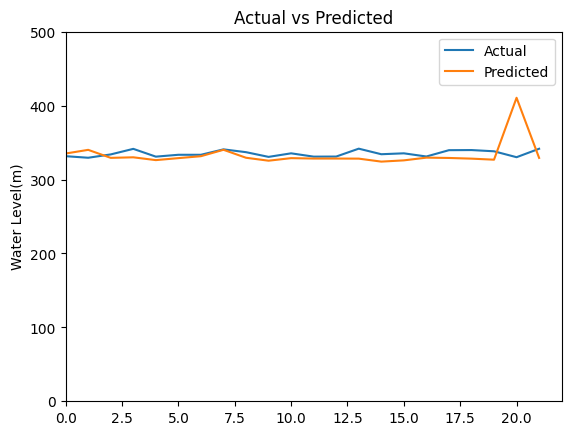

In [71]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlim(0,22)
plt.ylim(0,500)
plt.ylabel("Water Level(m)")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [72]:
type(X_test[0])
X_test[0]

array([0.71986837, 0.46969697, 0.71255061])

Plot loss curves for training and testing sets

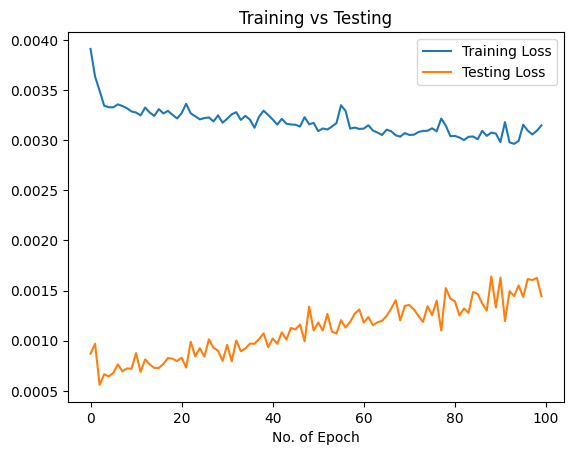

In [73]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel("No. of Epoch")
plt.title("Training vs Testing")
plt.legend()
plt.show()


In [74]:
model.save('model.h5')

In [17]:
df.head()

NameError: ignored